### COVID-19 cases in Roraima, version 2

After the first notebook, I thought of scraping Roraima's dashboard, since they don't provide an API or easily downloadable tabular data.



In this script I also create a distribution map of the cases, the final map is intended to be submitted to wikidata item [Q90508953](https://www.wikidata.org/wiki/Q90508953).

The [original notebook for the map](https://github.com/lubianat/covid_19_sandbox/blob/master/sao_paulo_covid/Map%20of%20Covid-19%20Cases%20in%20S%C3%A3o%20Paulo.ipynb) was made by Tiago Lubiana for São Paulo state, this is merely an adaption, so thank him!

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS

In [2]:
url = 'https://roraimacontraocorona.rr.gov.br/winner/public/mapa.xhtml'
response = requests.get(url)
soup = BS(response.content, "html.parser")

html_table = soup.find('table', {'role': 'grid'})


In [3]:
roraima = pd.read_html(str(html_table))[0]
roraima

,Cidade,Confirmados,Curados,Suspeitos,Descartados,Óbitos
0,Alto Alegre,1,-,-,1,1
1,Boa Vista,74,8,19,185,2
2,Bonfim,3,2,-,6,-
3,Cantá,3,-,-,2,-
4,Caracaraí,-,-,-,1,-
5,Caroebe,-,-,-,1,-
6,Mucajaí,-,-,-,3,-
7,Normandia,-,-,-,1,-
8,Pacaraima,2,-,-,10,-
9,Rorainópolis,-,-,-,2,-


In [4]:
roraima.drop(11,0, inplace=True)

In [5]:
import unidecode
roraima['Cidade'] = [c.upper() for c in roraima['Cidade']]
roraima

,Cidade,Confirmados,Curados,Suspeitos,Descartados,Óbitos
0,ALTO ALEGRE,1,-,-,1,1
1,BOA VISTA,74,8,19,185,2
2,BONFIM,3,2,-,6,-
3,CANTÁ,3,-,-,2,-
4,CARACARAÍ,-,-,-,1,-
5,CAROEBE,-,-,-,1,-
6,MUCAJAÍ,-,-,-,3,-
7,NORMANDIA,-,-,-,1,-
8,PACARAIMA,2,-,-,10,-
9,RORAINÓPOLIS,-,-,-,2,-


In [6]:
roraima.replace('-', 0, inplace=True)
roraima_cases = roraima.query("Confirmados !=0")
roraima_cases

,Cidade,Confirmados,Curados,Suspeitos,Descartados,Óbitos
0,ALTO ALEGRE,1,0,0,1,1
1,BOA VISTA,74,8,19,185,2
2,BONFIM,3,2,0,6,0
3,CANTÁ,3,0,0,2,0
8,PACARAIMA,2,0,0,10,0


In [7]:
import geopandas as gpd
mapa_dos_municipios = gpd.read_file("../Wikidata/estados_shapes/unzipped/14MUE250GC_SIR.shp")
mapa_dos_municipios.columns = ['Cidade', 'idMunicipio', 'geometry']
mapa_dos_municipios.head()

,Cidade,idMunicipio,geometry
0,AMAJARI,1400027,"POLYGON ((-60.60640 3.44846, -60.60492 3.44687..."
1,ALTO ALEGRE,1400050,"POLYGON ((-61.00054 3.44794, -61.00054 3.30346..."
2,BOA VISTA,1400100,"POLYGON ((-60.41023 3.58017, -60.41078 3.57379..."
3,BONFIM,1400159,"POLYGON ((-59.87190 3.56322, -59.87162 3.56157..."
4,CANTÁ,1400175,"POLYGON ((-60.15664 1.99964, -60.15709 1.99833..."


In [9]:
map_conf = pd.merge(mapa_dos_municipios, roraima_cases, on='Cidade', how='left')
map_conf

,Cidade,idMunicipio,geometry,Confirmados,Curados,Suspeitos,Descartados,Óbitos
0,AMAJARI,1400027,"POLYGON ((-60.60640 3.44846, -60.60492 3.44687...",NaN,NaN,NaN,NaN,NaN
1,ALTO ALEGRE,1400050,"POLYGON ((-61.00054 3.44794, -61.00054 3.30346...",1,0,0,1.0,1
2,BOA VISTA,1400100,"POLYGON ((-60.41023 3.58017, -60.41078 3.57379...",74,8,19,185.0,2
3,BONFIM,1400159,"POLYGON ((-59.87190 3.56322, -59.87162 3.56157...",3,2,0,6.0,0
4,CANTÁ,1400175,"POLYGON ((-60.15664 1.99964, -60.15709 1.99833...",3,0,0,2.0,0
5,CARACARAÍ,1400209,"POLYGON ((-61.02212 1.99963, -61.02054 1.99574...",NaN,NaN,NaN,NaN,NaN
6,CAROEBE,1400233,"POLYGON ((-59.41272 1.55158, -59.40355 1.55464...",NaN,NaN,NaN,NaN,NaN
7,IRACEMA,1400282,"POLYGON ((-62.91799 2.76386, -62.91770 2.76155...",NaN,NaN,NaN,NaN,NaN
8,MUCAJAÍ,1400308,"POLYGON ((-61.00051 2.68167, -60.99301 2.67740...",NaN,NaN,NaN,NaN,NaN
9,NORMANDIA,1400407,"POLYGON ((-59.70024 4.16053, -59.69856 4.15990...",NaN,NaN,NaN,NaN,NaN


In [14]:
map_conf["Confirmados"] = map_conf["Confirmados"].fillna(0)
map_conf["Confirmados"] = map_conf["Confirmados"].astype(float)

In [16]:
map_conf["casos_categorizados"] = pd.cut(map_conf["Confirmados"],
                                                    bins = [-1,1, 10,50,500],
                                                   labels = ["0", "1-10", "11-50", "51-500"])
map_conf

,Cidade,idMunicipio,geometry,Confirmados,Curados,Suspeitos,Descartados,Óbitos,casos_categorizados
0,AMAJARI,1400027,"POLYGON ((-60.60640 3.44846, -60.60492 3.44687...",0.0,NaN,NaN,NaN,NaN,0
1,ALTO ALEGRE,1400050,"POLYGON ((-61.00054 3.44794, -61.00054 3.30346...",1.0,0,0,1.0,1,0
2,BOA VISTA,1400100,"POLYGON ((-60.41023 3.58017, -60.41078 3.57379...",74.0,8,19,185.0,2,51-500
3,BONFIM,1400159,"POLYGON ((-59.87190 3.56322, -59.87162 3.56157...",3.0,2,0,6.0,0,1-10
4,CANTÁ,1400175,"POLYGON ((-60.15664 1.99964, -60.15709 1.99833...",3.0,0,0,2.0,0,1-10
5,CARACARAÍ,1400209,"POLYGON ((-61.02212 1.99963, -61.02054 1.99574...",0.0,NaN,NaN,NaN,NaN,0
6,CAROEBE,1400233,"POLYGON ((-59.41272 1.55158, -59.40355 1.55464...",0.0,NaN,NaN,NaN,NaN,0
7,IRACEMA,1400282,"POLYGON ((-62.91799 2.76386, -62.91770 2.76155...",0.0,NaN,NaN,NaN,NaN,0
8,MUCAJAÍ,1400308,"POLYGON ((-61.00051 2.68167, -60.99301 2.67740...",0.0,NaN,NaN,NaN,NaN,0
9,NORMANDIA,1400407,"POLYGON ((-59.70024 4.16053, -59.69856 4.15990...",0.0,NaN,NaN,NaN,NaN,0


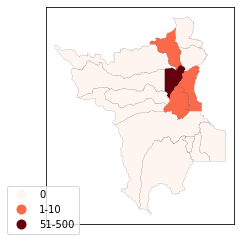

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = map_conf.plot(column='casos_categorizados',
                         categorical=True, 
                         legend=True, 
                         figsize=(100,6),
                         markersize=46,
                         cmap = "Reds",
                         edgecolor='k',
                         linewidth=0.1,
                         ax=ax);
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))